  # ECE 321: Continuous-Time Signals and Systems #
 ### Spring 2025 ###
 ### Lab 1 ###
 ___________________________________________

 ### Due Date ###

Please follow the ECE 321 lab report guidelines and requirements that are provided in the Lab Syllabus. Refer
to the Laboratory Schedule for your section to determine the report due date. Submit via Canvas. </font>

 ### Description ###

 The purpose of this lab is to review properties of continuous-time sinusoidal signals and to refresh on how
Python can be used to visualize and analyze these signals. You will practice on basic signal operations and
transformations. You will also review the Nyquist sampling theorem and consider the required sampling rate
for sinusoids. Before beginning the lab, please read Sections 1.2-1.3 of the Signals and Systems textbook by
Oppenheim and Willsky. Review your ECE 201 notes on sinusoidal signals, sampling theory, and the use of
Python NumPy functions for scientific computing.

### 1 Signal operations ###

<blockquote> (a) Transform complex numbers from rectangular to polar form and vice versa using NumPy library. <br>
To install this library, you may use the following command: <br>
    !pip install NumPy<br>
then you may need to restart the Kernel.<br>
    Given x = 5 + j6 and y = 2 − j3 in their Cartesian coordinates, use NumPy library functions as np.abs for amplitud and np.angle for angular phase, and convert x and y to polar form. Then, revert the transformation to obtain the rectangular coordinates. Write down x
and y in polar coordinates by using print function. </font> </blockquote>

In [2]:
import numpy as np

# Given rectangular (Cartesian) coordinates
x_rectangular = 5+6j             #please give x in their Cartesian coordinates
y_rectangular = 2-3j           #please give y in their Cartesian coordinates

# Convert to polar form
x_polar = np.abs(x_rectangular), np.angle(x_rectangular, deg=True)
y_polar = np.abs(y_rectangular), np.angle(y_rectangular, deg=True)

# Print polar coordinates
print(f"x in polar coordinates: {x_polar}")
print(f"y in polar coordinates: {y_polar}")
print("------------------------------------------------------------------------------------------")

# Convert back to rectangular form
x_rectangular_back = x_polar[0] * np.exp(1j * np.radians(x_polar[1]))
y_rectangular_back = y_polar[0] * np.exp(1j * np.radians(y_polar[1]))

# Print rectangular coordinates after conversion back
print(f"x in rectangular coordinates (after conversion back): {x_rectangular_back}")
print(f"y in rectangular coordinates (after conversion back): {y_rectangular_back}")

x in polar coordinates: (7.810249675906654, 50.19442890773481)
y in polar coordinates: (3.605551275463989, -56.309932474020215)
------------------------------------------------------------------------------------------
x in rectangular coordinates (after conversion back): (4.999999999999999+6.000000000000001j)
y in rectangular coordinates (after conversion back): (2-2.9999999999999996j)


So, in polar form, x = 7.81 e^(50j) and y = 3.6 e^(-56.3j)


Note that :
Amplitude=|x|=| a+bj|= √(a^2+b^2 )
Phasor=  tan^(-1)⁡〖(b/a)〗

From these outputs, we can conclude that np.abs() and np.angle() functions extract the magnitude and phase of a complex number and how the numbers can be reconstructed from polar coordinates which approves of the whole process.


In part (b), we perform multiplication and division of complex numbers in both Cartesian and polar forms. In polar domain, for multiplication, we multiply the magnitudes and add the angles and for division, we divide the magnitudes and subtract the angles.

<blockquote> (b) Find u = xy and v = x/y in Cartesian and polar coordinates. Write down u and v in both coordinates.</font> </blockquote>

In [3]:
# Calculate u
u = x_rectangular * y_rectangular #please give u here. you can use x_rectangular as x and y_rectangular as y.

# Calculate v
v = x_rectangular / y_rectangular  #please give v here. you can use x_rectangular as x and y_rectangular as y.

# Print results
print(f"u in Cartesian coordinates: {u}")
print(f"v in Cartesian coordinates: {v}")

# Convert to polar coordinates
u_polar = np.abs(u), np.angle(u, deg=True)
v_polar = np.abs(v), np.angle(v, deg=True)

# Print results
print(f"u in polar coordinates: {u_polar}")
print(f"v in polar coordinates: {v_polar}")

u in Cartesian coordinates: (28-3j)
v in Cartesian coordinates: (-0.6153846153846155+2.076923076923077j)
u in polar coordinates: (28.160255680657446, -6.115503566285407)
v in polar coordinates: (2.166173513896727, 106.50436138175503)



In Cartesian coordinates, the results are calculated by arithmetic operations on the real and imaginary parts whereas in polar coordinates, the operations are simpler because they involve multiplying or dividing magnitudes and adding or subtracting angles.


In part (c), we simply show the phasor x with frequency of 50 Hz as a sinusoidal signal in the time domain and plot it for one second.

<blockquote> (c) Convert the phasor x into a sinusoid x(t) at frequency $f_0 = 50$ Hz. Write down the mathematical expression for x(t). Plot x(t) for one second, using the function plot from module pyplot at matplotlib library. <br>
To install this library, you may use the following command: <br>
    !pip install matplotlib<br>
then you may need to restart the Kernel.<br> Label the x-axis and y-axis clearly to properly indicate the time scale and amplitude. To lable the axes you may use the following code: <br>
plt.xlabel('Time (s)')<br>
plt.ylabel('Amplitude')<br>
    </font> </blockquote>

Let us assume a specific phasor $x=Ae^{j\phi}$, where $A$ is the amplitude of x, and $\phi$ is the phase angle of x. In this case, the expression for $x(t)$ becomes:

$x(t)=Acos⁡(2\pi f_0t+\phi)$

Now, let us plot $x(t)$ for one second using Python and the matplotlib library. Ensure you have the library installed by running pip install matplotlib if you haven not already.

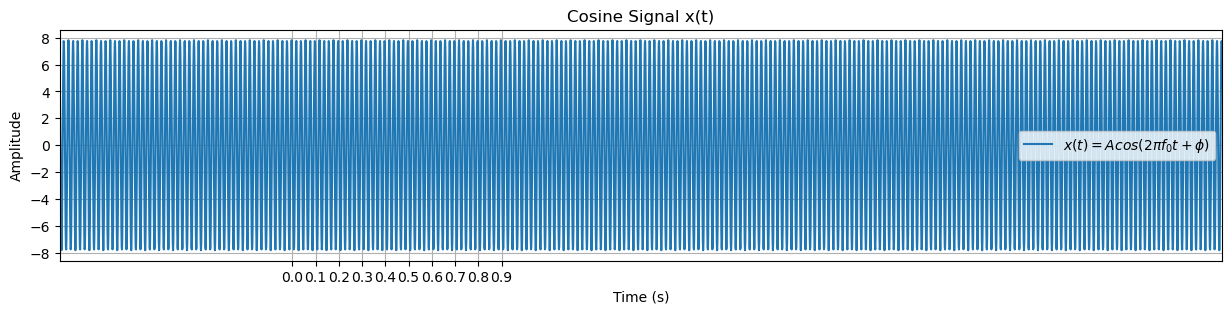

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Given values
A = np.abs(x_rectangular)  # Amplitude
f0 = 50  # Frequency in Hz
phi = math.radians(np.angle(x_rectangular, deg=True)) # Phase angle in radians



sampling_rate = 1000
start_point = -1
end_point = 4
duration = end_point - start_point

# Time values from 0 to 1 second with a small time step
t = np.linspace(start_point, duration, int(sampling_rate * duration), endpoint=False)

# Mathematical expression for x(t).
x_t = A * np.cos(2 * np.pi * f0 * t + phi) #please give x_t here. You can use np.cos() as cos, np.pi as π

# Plot the cosine signal
plt.figure(figsize=(15, 3))
plt.plot(t, x_t, label='$ x(t) = Acos⁡(2\pi f_0t+\phi)$')
plt.title('Cosine Signal x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(-8, 10, step=2))
plt.grid(True)
plt.xlim((start_point,end_point))
plt.show()



From the plot, we can see that x will oscillate with a peak amplitude of around 7.81 with a frequency of 50 Hz and a phase shift of 0.876 radians as expected since |x| = 7.81 with angle of 50.19 degrees which is equal to 0.876 radians. Also, over this five seconds the sinusoid will complete 250 cycles since the frequency is 50 Hz.

In part (d), we Create and plot two signals which are made of the rectangular window function w(t) and the sinusoid x(t). These functions are z(t) = w(t) * x(t) which is the multiplication of the rectangular function and sinusoid and also z ̃ = w(t) + x(t) that is addition of the rectangular function and sinusoid.

<blockquote> (d) Let $w(t) = u(t) − u(t − 1)$ denote a rectangular function of time-length 1, where $u(t)$ is the unit step function. The signal $x(t)$ in (c) is transformed into $z(t$) and $\tilde{z}(t)$ as below. Plot $z(t)$ and $\tilde{z}(t)$ for $−1 \leq t \leq 2$ in second. Label the x-axis and y-axis clearly to properly indicate the time scale and amplitude.
    
$z(t) = w(t)x(t)$ and $\tilde{z}(t) = w(t) + x(t)$.</font> </blockquote>

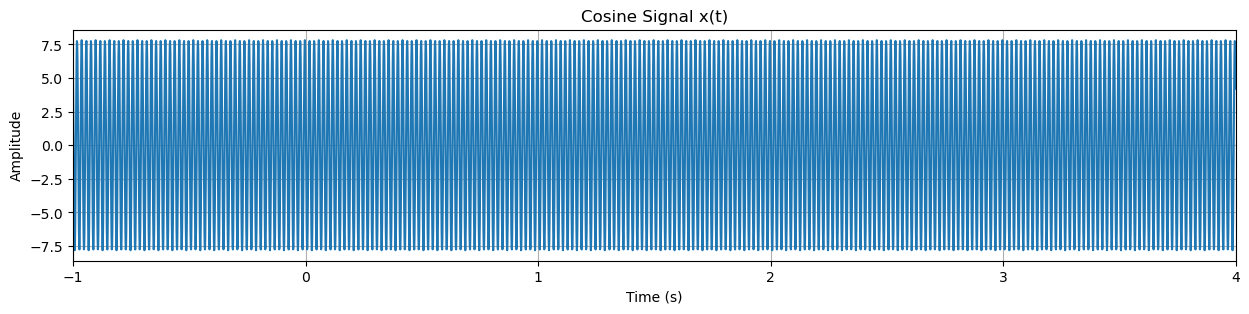

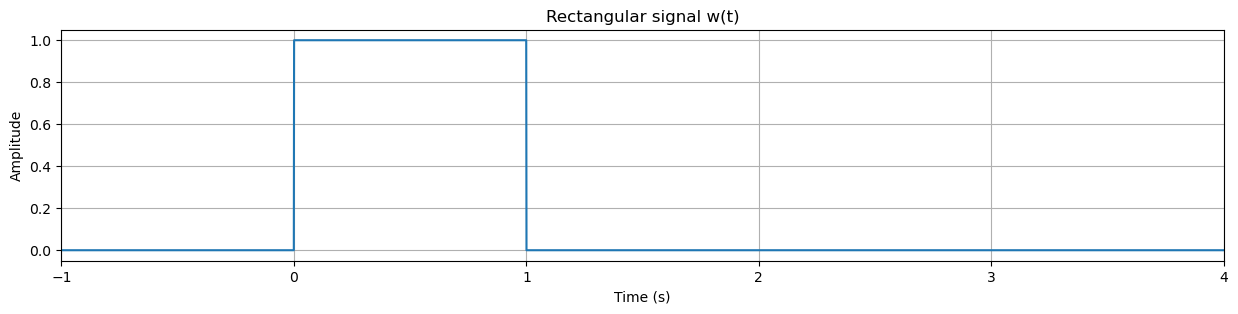

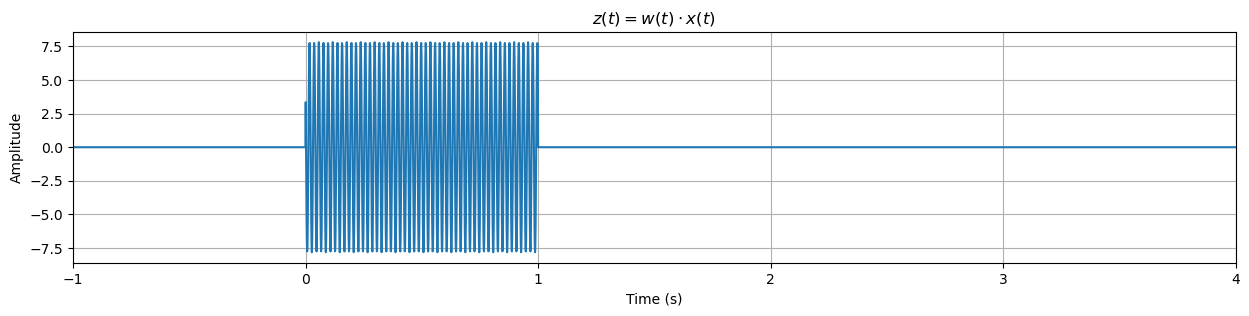

(-1.0, 4.0)

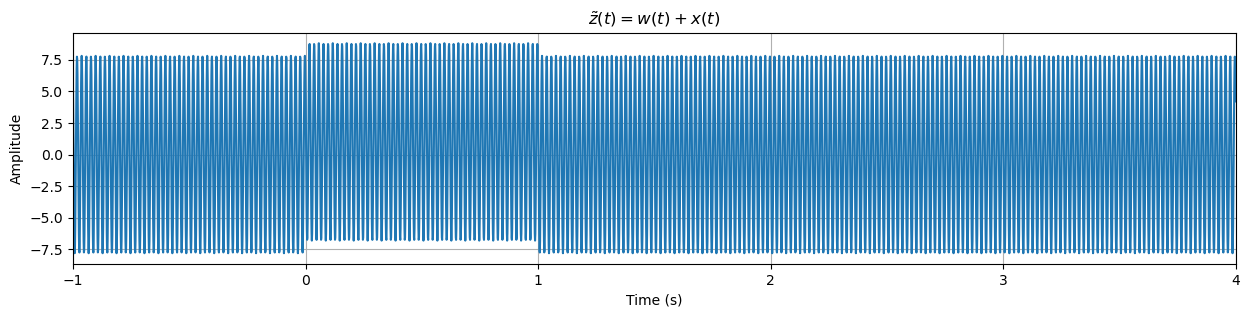

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given signal x(t)
def x(t):
    x_t = A * np.cos(2 * np.pi * f0 * t + phi) # The signal  𝑥(𝑡)  in (c)
    return x_t


# Plotting
plt.figure(figsize=(15, 3))
plt.xlim(start_point, end_point)
plt.plot(t, x(t), label='$ x(t) = Acos⁡(2\pi f_0t+\phi)$')
plt.title('Cosine Signal x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim((start_point,end_point))
plt.show()


# Unit step function
def u(t):
    return np.piecewise(t, [t < 0, t >= 0], [0, 1])

# Rectangular function w(t)
def w(t):
    w_t = u(t)-u(t-1) #please give w(t) here.
    return w_t

start_point = -1
end_point = 4

# Plotting
plt.figure(figsize=(15, 3))
plt.xlim(start_point, end_point)
plt.plot(t, w(t), label='$ w(t) = u(t) - u(t-1)$')
plt.title('Rectangular signal w(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim((start_point,end_point))
plt.show()

# Signal z(t)
def z(t):
    z_t = w(t)*x(t)  #please give z(t) here.
    return z_t


# Plotting
plt.figure(figsize=(15, 3))
plt.xlim(start_point, end_point)
plt.plot(t,  z(t))
plt.title('$z(t) = w(t) \\cdot x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
# plt.xticks(np.arange(start_point, end_point, step=0.5))
# plt.yticks(np.arange(-8, 10, step=2))
plt.xlim((start_point,end_point))
plt.show()

# Signal z~(t)
def ztilde(t):
    ztilde_t = w(t)+x(t)  #please give ztilde_t here.
    return ztilde_t


# Plotting
plt.figure(figsize=(15, 3))
plt.xlim(start_point, end_point)
plt.plot(t, ztilde(t))
plt.title('$\\tilde{z}(t) = w(t) + x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
# plt.xticks(np.arange(start_point, end_point, step=0.5))
# plt.yticks(np.arange(-8, 10, step=2))
plt.xlim((start_point,end_point))


From the plots and their corresponding functions, we can confirm that since w(t) = u(t) - u(t - 1) forms a window that is 1 for 0 ≤ t < 1 and 0 elsewhere, z(t) is the sinusoid x(t) that is visible only between t = 0 and  t = 1 because the rectangular window w(t) deletes signal outside this range and for z ̃(t), it is the sinusoid x(t) added to the rectangular window w(t) which means between t = 0 and t = 1, the plot looks like a sinusoid shifted upwards by 1.

Finally, in part (e), we apply various time transformations to z(t) and plot the results. 

<blockquote> (e) Consider z(t) in (d). Find and plot the following transformed signals.
    
$y_0(t) = z(t/3)\\
y_1(t) = z(3t)\\
y_2(t) = z(−t + 1)\\
y_3(t) = z(−3t + 1)\\
y_4(t) = z(−3t^2 + 1))$ </font> </blockquote>

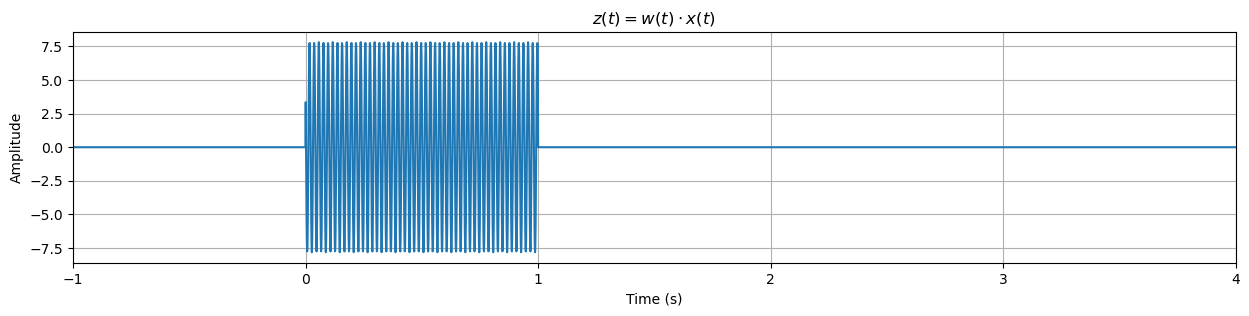

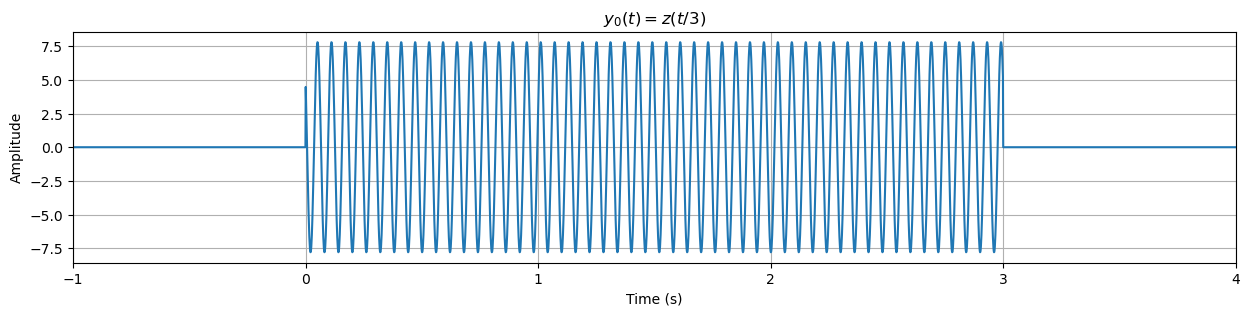

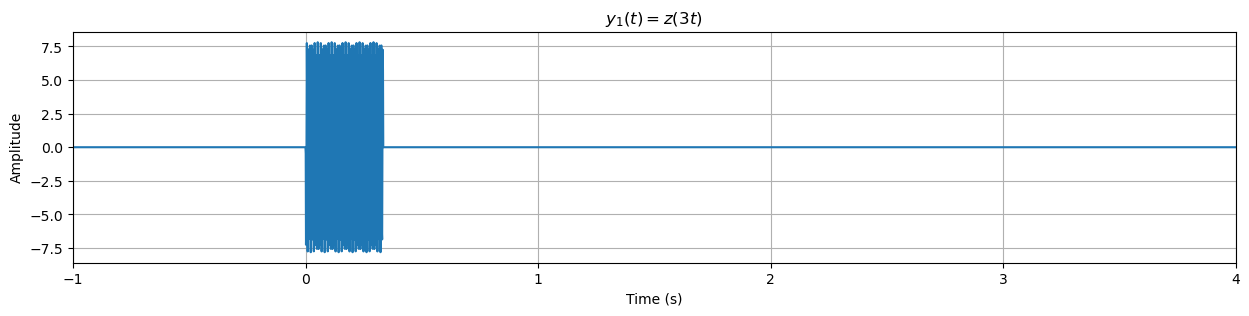

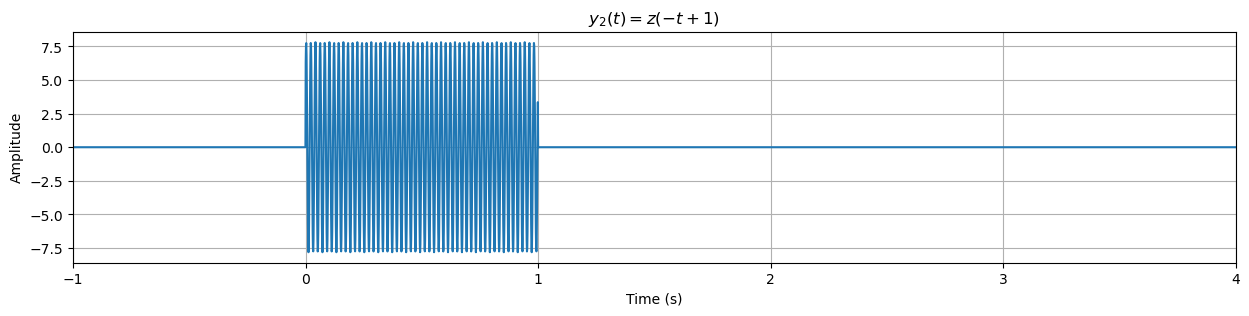

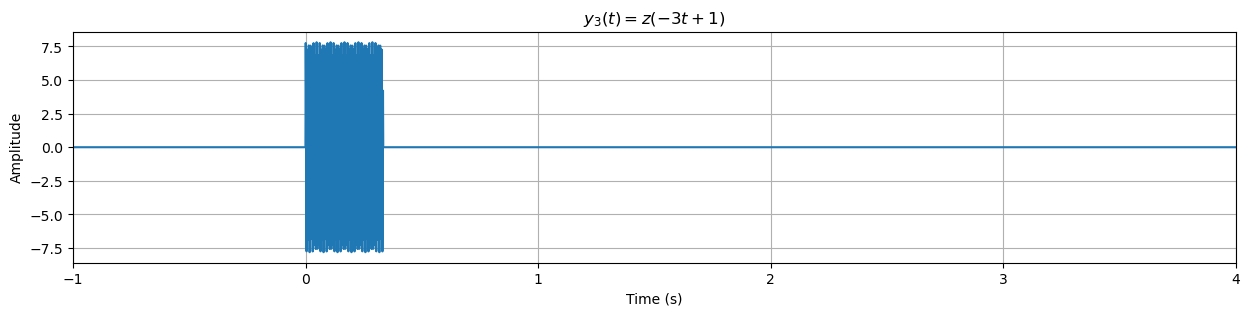

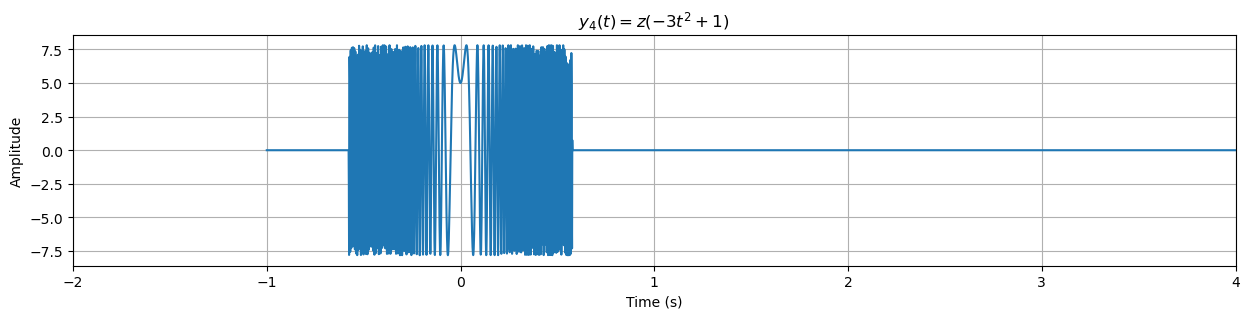

In [17]:

# Plotting
plt.figure(figsize=(15, 3))
plt.plot(t,  z(t))
plt.title('$z(t) = w(t) \\cdot x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim((start_point,end_point))
plt.show()

# Transformed signals
def y0(t):
    return z(t/3)

plt.figure(figsize=(15, 3))
plt.plot(t, y0(t))
plt.title('$y_0(t) = z(t/3)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(start_point, end_point)
plt.show()



def y1(t):
    return z(3*t) #please give y1(t) here.


# plt.subplot(3, 2, 3)
plt.figure(figsize=(15, 3))
plt.plot(t, y1(t))
plt.title('$y_1(t) = z(3t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(start_point, end_point)
plt.show()


def y2(t):
    return z(-t+1) #please give y2(t) here.

# plt.subplot(3, 2, 4)
plt.figure(figsize=(15, 3))
plt.plot(t, y2(t))
plt.title('$y_2(t) = z(-t + 1)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(start_point, end_point)
plt.show()


def y3(t):
    return z(-3*t+1)  #please give y3(t) here.


# plt.subplot(3, 2, 5)
plt.figure(figsize=(15, 3))
plt.plot(t, y3(t))
plt.title('$y_3(t) = z(-3t + 1)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(start_point, end_point)
plt.show()

def y4(t):
    return z(-3*t**2+1) #please give y4(t) here.

plt.figure(figsize=(15, 3))
plt.plot(t, y4(t))
plt.title('$y_4(t) = z(-3t^2 + 1)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-2, end_point)
plt.show()

From the plots, we can conclude that:


y0(t) looks stretched horizontally. 


y1(t) looks compressed horizontally. 


y2(t) will flip the signal along the horizontal axis and shift it. 


y3(t) will flip and compress the signal while shifting it. 


y4(t) gives a non-linear distortion, making the signal look warped in positive time.


### 2 Review of Sinusoidal Signals and Sampling ###

#### 2.1 Sinusoids ####

<blockquote> Define a Python function that generates all the plots for this section. Save this module for future use.
Consider the sinusoidal signal defined below:
    
    
$x(t)=A\cos(2\pi f_0 t+\theta)$
    
For this part assume that the parameters are: $A=1$, $f_0=600$ Hz, and $\theta=\pi/3$ rad. </font>

Steps to Create a Function in Python:

1. Define the Function:
Use the def keyword followed by the function name and parentheses. If the function takes parameters, list them inside the parentheses.

2. Write the Function Body:
Indent the code block that forms the body of the function. This is where you define what the function does.

3. Use the return Statement (optional):
If your function produces a result, you can use the return statement to send that result back to the caller.

4. Calling the Function:
After defining the function, you can call it by using its name followed by parentheses. If the function takes parameters, provide values inside the parentheses.<br>
    
Example Code: <br>
def greet(name): # Step 1: Define the function<br>
message = "Hello, " + name + "!" # Step 2: Write the function body<br>
return message # Step 3: Use the 'return' statement (optional)<br>
result = greet("John") # Step 4: Calling the function<br>
print(result) # Display the result<br>

</blockquote>

## Review of Sinusoidal Signals and Sampling

### Sinusoids

Define a Python module that generates all the plots for this section. Save this module for future use.

Consider the sinusoidal signal defined below:
$$
x(t)=A\cos(2\pi f_0 t+\theta).
$$
For this part assume that the parameters are: \( A=1 \), \( f_0=600 \) Hz, and \( \theta=\frac{\pi}{3} \) rad.

1. What is the period \( $T_0$ \) of this signal?
2. How fast must this signal be sampled to avoid aliasing? Recall that this is the Nyquist rate. Which parameters affect the required sample rate?
3. Select a sample rate \( f_s \) that is close to the Nyquist rate and make a plot of 4 periods of this signal. Plot the signal versus the appropriate time axis (not sample number). Your plot should start at \( t=0 \). Indicate what sample rate you used to generate the plot.
4. To make a sinusoidal plot that looks like a continuous-time signal, it is often necessary to sample a signal at a rate significantly higher than the Nyquist rate. Experiment with the sampling rate required to make a smooth plot of \( x(t) \). Plot this highly sampled version on the same axes as the previous plot using a different line style. You should use the label command to label the two lines.
5. Comment on the sampling rate required to make the signal appear continuous. In some applications, you will want to have a sampling rate high enough so that the plots are smooth, but not so high that it is a burden to process and/or store more samples than necessary. In future work, you will be expected to be able to select an appropriate sampling rate when creating plots of simulated continuous-time signals.


## Review of Sinusoidal Signals and Sampling

### Sinusoids

Define a Python module that generates all the plots for this section. Save this module for future use.

Consider the sinusoidal signal defined below:
$$
x(t)=A\cos(2\pi f_0 t+\theta).
$$
For this part assume that the parameters are: $A=1$, $f_0=600$ Hz, and $\theta=\frac{\pi}{3}$ rad.

1. What is the period $T_0$ of this signal?
2. How fast must this signal be sampled to avoid aliasing? Recall that this is the Nyquist rate. Which parameters affect the required sample rate?
3. Select a sample rate $f_s$ that is close to the Nyquist rate and make a plot of 4 periods of this signal. Plot the signal versus the appropriate time axis (not sample number). Your plot should start at $t=0$. Indicate what sample rate you used to generate the plot.
4. To make a sinusoidal plot that looks like a continuous-time signal, it is often necessary to sample a signal at a rate significantly higher than the Nyquist rate. Experiment with the sampling rate required to make a smooth plot of $x(t)$. Plot this highly sampled version on the same axes as the previous plot using a different line style. You should use the label command to label the two lines.
5. Comment on the sampling rate required to make the signal appear continuous. In some applications, you will want to have a sampling rate high enough so that the plots are smooth, but not so high that it is a burden to process and/or store more samples than necessary. In future work, you will be expected to be able to select an appropriate sampling rate when creating plots of simulated continuous-time signals.


**Answers of questions with some theoretical explanation:**

In this question, we are dealing with a signal

x(t) = A cos(2πf_0 t+ θ)

where A = 1, f0 = 600 Hz and θ=π/3 radians.

So, x(t) = cos(2π(600)t+  π/3)

Thus, period of this signal is **T0 = 2π/1200π=1/600  seconds**

In order to avoid aliasing, the sampling rate must be greate than Nyquist rate which is twice the maximum frequency component of the signal. In this case,

fNyquist = 2 * 600 = 1200 Hz


Thus, **fsampling > 1200 Hz** to avoid aliasing.


Parameter directly affecting the sample rate is the frequency f0 which determines the Nyquist rate because the signal's highest frequency is f0 (which is 600 Hz in this example).


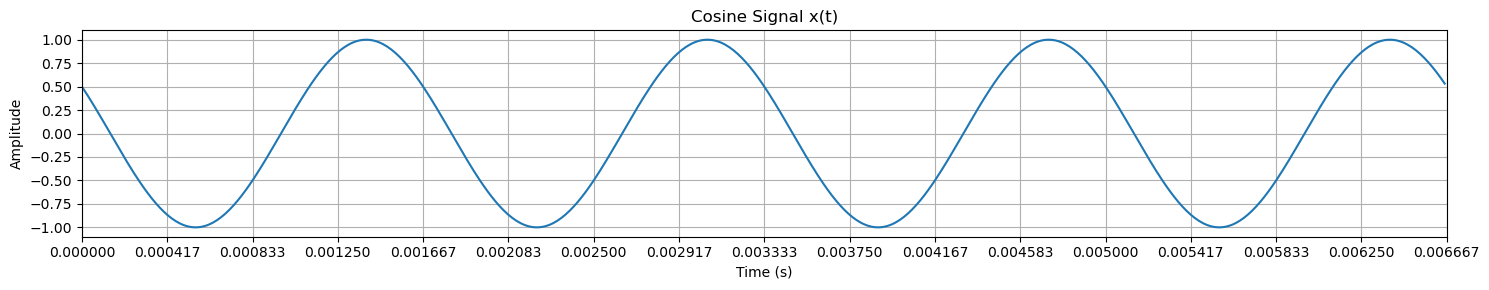

In [11]:
import numpy as np
import matplotlib.pyplot as plt

A=1 # Amplitude
f0=600 # Frequency
theta=np.pi/3 # Angular phase in radious
T0 = 1 / f0 # Period
duration= 4 * T0 # plotting duration
sampling_rate=100000 # sampling rate


def generate_cosine_plot(A, f0, theta, sampling_rate, marker_flag = False):
    """
    Generate plots for a sinusoidal signal.

    Parameters:
    - A: Amplitude of the sinusoidal signal.
    - f0: Frequency of the sinusoidal signal in Hertz.
    - theta: Phase angle in radians.
    - duration: Duration of the signal in seconds.
    - sampling_rate: Number of samples per second.

    Returns:
    None (displays plots).
    """
    duration = 4 / f0
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    x_t =  A * np.cos(2 * np.pi * f0 * t + theta)    #please give x_t here.

    # Plot the signal in time domain
    plt.figure(figsize=(15, 3))
    if marker_flag == True:
        plt.plot(t, x_t, color='blue', marker='o')
        plt.title(f'Cosine Signal x(t) with sampling rate {sampling_rate} Hz')
    else:
        plt.plot(t, x_t)
        plt.title(f'Cosine Signal x(t)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim((0,4*T0))
    plt.xticks(np.arange(0, duration+T0/4, step=T0/4))
    plt.yticks(np.arange(-A, 5*A/4, step=A/4))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with default parameters
generate_cosine_plot(A, f0, theta, sampling_rate)

<blockquote> (a) What is the period T0 of this signal?</font> </blockquote>

$T_0 = \frac{1}{f_0}=\frac{1}{600}$ s

In [12]:
# Period
T0 = 1/f0  #please give T0 here.
T0_ms = T0 * 1000
# Display the result
print(f"The period T0 of the sinusoidal signal is {T0:.6f} seconds, that is {T0_ms:.2f} milliseconds.")

The period T0 of the sinusoidal signal is 0.001667 seconds, that is 1.67 milliseconds.


<blockquote>(b) How fast must this signal be sampled to avoid aliasing? Recall that this is the Nyquist rate. Which
parameters affect the required sample rate?</font> </blockquote>

To avoid aliasing, the signal must be sampled at a rate higher than the Nyquist rate, which is twice the highest frequency component in the signal. The Nyquist rate $f_{Nyquist}$ is given by:

$f_{Nyquist}=2×f_{max}$

where $f_{max}$ is the maximum frequency component in the signal.

In the given sinusoidal signal, the frequency $f_0$ is the maximum frequency component. Therefore, the Nyquist rate is:

$f_{Nyquist}=2×f_{0}$

Let's calculate the Nyquist rate and discuss which parameters affect the required sample rate:

In [13]:

# Calculate the Nyquist rate
nyquist_rate = 2*f0 #please give 𝑓𝑁𝑦𝑞𝑢𝑖𝑠𝑡 here.

# Display the Nyquist rate
print(f"The Nyquist rate for the given signal is {nyquist_rate} Hz.")

The Nyquist rate for the given signal is 1200 Hz.


<blockquote>(c) Select a sample rate $f_s$ that is close to the Nyquist rate and make a plot of 4 periods of this signal and name this signal x1. Plot the signal versus the appropriate time axis (not sample number). Your plot should start at $t = 0$. Indicate what sample rate you used to generate the plot.</font> </blockquote>

For a frequency sampling close to Nyquist rate, the function given to us by the instruction itself, wants us to use the 85% of the Nyquist rate which will be 0.85 * 1200 = 1020 Hz.
Plotting the signal for 4 periods with this sampling rate:


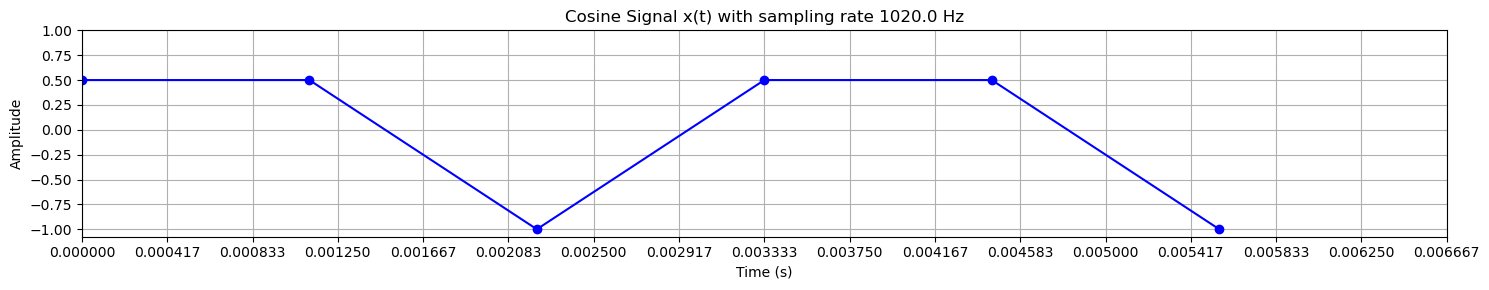

In [14]:
generate_cosine_plot(A, f0, theta, sampling_rate = 0.85 * nyquist_rate,  marker_flag = True)

We can see that the plot shows 4 cycles of the sinusoidal signal but it looks discrete since it is sampled at a rate close to and less than the Nyquist rate.

<blockquote> (d) To make a sinusoidal plot that looks like a continuous-time signal, it is often necessary to sample a signal at a rate significantly higher than the Nyquist rate (Name this signal x2). Experiment with the sampling rate required to make a smooth plot of x(t). Plot this highly sampled version on the same axes as the previous plot using a different linestyle.<br>
    
To make different linestiles, you may use the following commands to represent plots different from each other on the same figure:<br>
    
plt.plot(t, x1, label='label1', marker='o', linestyle='-', color='blue')<br>
plt.plot(t, x2, label='label2', marker='s', linestyle='--', color='green')<br>
    
</font> </blockquote>

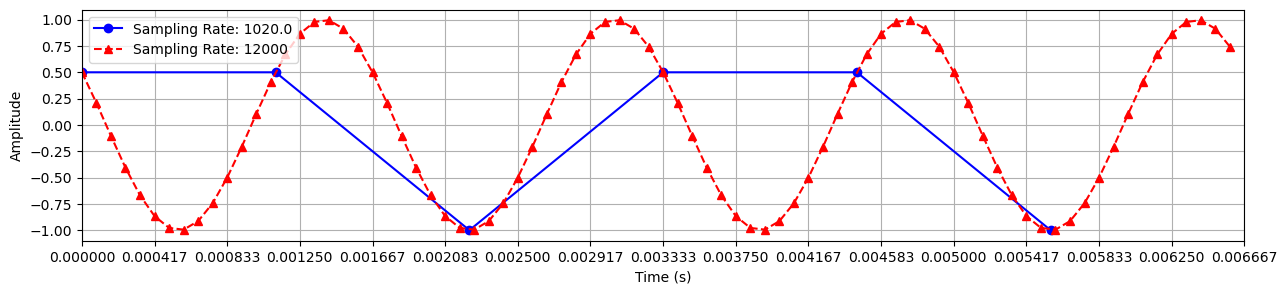

In [16]:

plt.figure(figsize=(15, 3))
duration = 4 / f0
sampling_rate = .85 * nyquist_rate
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
x_t = A * np.cos(2 * np.pi * f0 * t + theta)     #please give x_t here.
plt.plot(t, x_t, color='blue', marker='o', linestyle='-', label= f'Sampling Rate: {sampling_rate}')

sampling_rate = 10 * nyquist_rate
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
x_t = A * np.cos(2 * np.pi * f0 * t + theta)     #please give x_t here.


# Plot the signal in time domain
# plt.figure(figsize=(15, 3))
plt.plot(t, x_t, color='red', marker='^', linestyle='--', label= f'Sampling Rate: {sampling_rate}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim((0,duration))
plt.xticks(np.arange(0, duration+T0/4, step=T0/4))
plt.yticks(np.arange(-A, 5*A/4, step=A/4))
plt.grid(True)

plt.legend()
plt.show()

As expected, we can see that using a higher sampling rate creates a **smoother** plot of the same sinusoidal signal that more closely looks like a continuous-time sinusoidal signal.

#### 2. 2 Sums of Sinusoids ####

<blockquote> In this part you will generate a signal consisting of a sum of sinusoids with specified amplitudes, frequencies,
and phases. You can synthesize music using sums of sinusoids.</font> </blockquote>

<blockquote> (a) Write a Python function module called "sum_of_sines" that produces a signal consisting of an arbitrary sum of sampled sinusoidal signals, i.e.,  <br>
    
$x_{\rm sum}(t)=\sum_k A_k\cos(2\pi f_kt+\theta).$ <br>
    
The function should take the following inputs:
- Vector A containing the amplitudes of the sinusoids
- Vector f containing the frequencies of the sinusoids (in Hz)
- Vector theta containing the phases of the sinusoids (in rad)
- Vector t containing the vector of sample times <br>
    
The output of the function is x, a vector containing the summed signal xsum(t). Note that the function
should automatically determine how many sinusoids are in the sum by the length of the frequency vector.
You may use either a for loop or a matrix multiply to implement the summation.
    </font> </blockquote>

In this part, we start by creating a function that computes the sum of multiple sinusoidal signals, each defined by its amplitude, frequency and phase offset.

The function should output a vector representing the summed sinusoidal signal, where each individual sinusoid has been added together.


Now, in next part, we verify the correctness of the sum_of_sines function by testing it with example inputs and visualizing the output.


In [17]:
import numpy as np

def sum_of_sines(A, f, theta, t):
    """
    Generate a signal consisting of an arbitrary sum of sampled sinusoidal signals.

    Parameters:
    - A: Vector containing the amplitudes of the sinusoids.
    - f: Vector containing the frequencies of the sinusoids (in Hz).
    - theta: Vector containing the phases of the sinusoids (in rad).
    - t: Vector containing the vector of sample times.

    Returns:
    Vector x containing the summed signal x_sum(t).
    """
    num_sinusoids = len(f)
    x_sum = np.zeros_like(t)

    for k in range(num_sinusoids):
        x_sum += A[k] * np.cos(2 * np.pi * f[k] * t + theta[k])

    return x_sum


<blockquote>(b) Test your function. Explain how you tested the code and provide a few plots verifying that your function
worked.</blockquote>

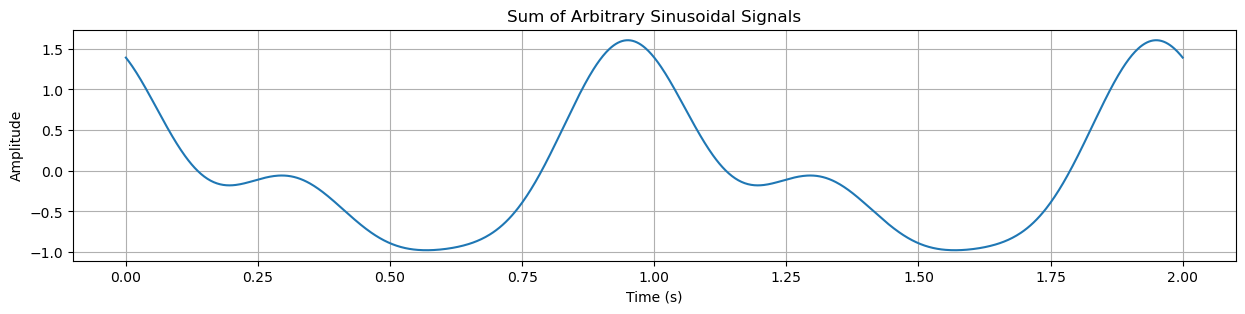

In [18]:
import matplotlib.pyplot as plt

# Example parameters
A = [1, 0.5, 0.2]  # Amplitudes
f = [1, 2, 3]      # Frequencies (Hz)
theta = [0, np.pi/3, np.pi/4]  # Phases (rad)
t = np.linspace(0, 2, 1000)  # Sample times

# Generate the summed signal
x_sum = sum_of_sines(A, f, theta, t)

# Plot the summed signal
plt.figure(figsize=(15, 3))
plt.plot(t, x_sum)
plt.title('Sum of Arbitrary Sinusoidal Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

<blockquote>(c) Use your function to generate 3 seconds of a signal consisting of a sum of equal-amplitude sinusoids with frequencies $261.63$ Hz, $329.63$ Hz, and $392.00$ Hz. <br>
    
(This is a C major chord - see https://en.wikipedia.org/wiki/Major_chord and https://pages.mtu.edu/~suits/notefreqs.html).  Select an appropriate sampling frequency for your signal using your work from the previous section so that your signal appears continuous when plotted.</blockquote>


In part (c), we use the sum_of_sines function to simulate a C major chord by summing three sinusoids with specific frequencies by using:


f1=261.63 Hz (C)


f2=329.63 Hz (E)


f3=392.00 Hz (G)


The maximum frequency in the chord is 392 Hz, so the Nyquist rate is: 


fNyquist = 2 * 392 = 784.00 Hz


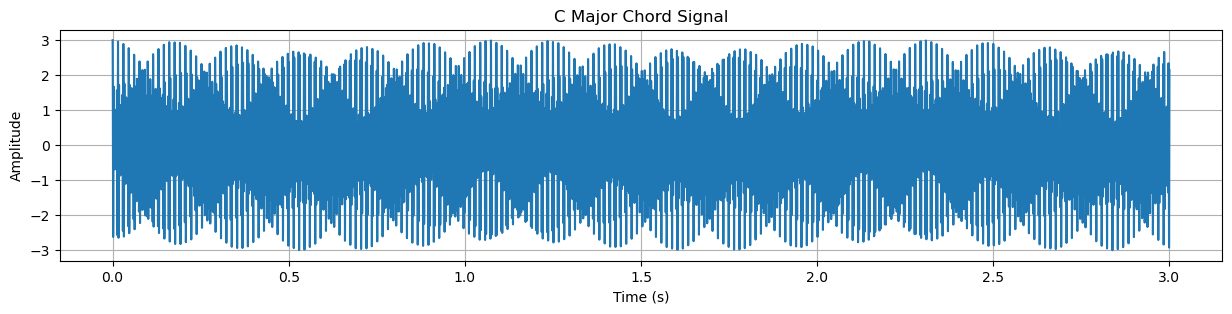

In [20]:


# Parameters for the C major chord
amplitudes = [1, 1, 1]  # Equal amplitudes
frequencies = [261.63, 329.63, 392]  # Frequencies of the C major chord, please give.
phases = [0, 0, 0]  # No phase shift
duration =  3 # seconds, please give.

# Calculate the Nyquist rate
nyquist_rate = 2 * max(frequencies)

# Generate sample times with a sufficient number of samples
sampling_rate = 10 * nyquist_rate  # Choose a higher sampling rate for clarity
sample_times = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the summed signal
chord_signal = sum_of_sines(amplitudes, frequencies, phases, sample_times)

# Plot the summed signal
plt.figure(figsize=(15, 3))
plt.plot(sample_times, chord_signal)
plt.title('C Major Chord Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

This plot shows a periodic waveform that represents the sum of the three sinusoids and looks continuous and smooth because of the adequate sampling rate.

<blockquote>(d) Play your signal through the computer speakers using sounddevice library. To install this library, you may use the following command: <br>
    !pip install sounddevice<br>
then you may need to restart the Kernel.
</blockquote>

In [21]:
# !pip install sounddevice
!sudo apt-get install portaudio19-dev


'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
# This is another sound playing tool suitable for Google Colab
# If neither works, student should find and install a tool by themselves.
from IPython.display import Audio
Audio(data=chord_signal, rate=sampling_rate)


We hear a harmonious C major chord lasting 3 seconds which consist of the three frequencies 261.63 Hz, 329.63 Hz and 392 Hz played simultaneously.